# Enunciado

Realizar el ejercicio 3 de Naive Bayes y KNN con RandomForest.

# 1. Importación de datos   

In [11]:
import pandas as pd

# Cargar el conjunto de datos desde el archivo CSV
df = pd.read_csv("csv/winequality-red.csv")

# Sustituimos los espacio por guiones bajos
df.columns = [x.replace(" ", "_") for x in df.columns]
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Preparación de los datos

In [12]:
# Eliminar la columna "quality" para obtener las características (X)
X = df.drop("quality", axis=1)

# Seleccionar la columna "quality" como las etiquetas (y)
y = df["quality"]


# 3. Visualización de los datos

C:\Users\Marcos\AppData\Local\Temp\ipykernel_6508\863704638.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  for i, data in enumerate(df.groupby("quality").apply(lambda x: x[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values)):


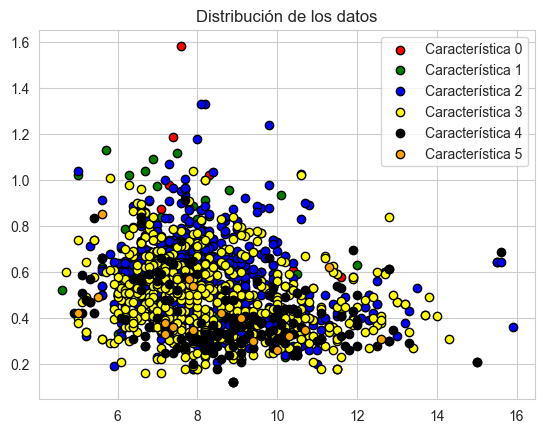

In [13]:
from matplotlib import pyplot as plt

# Lista de colores para cada nivel de calidad
COLORS = ["red", "green", "blue", "yellow", "black", "orange", "purple", "pink", "brown", "gray", "cyan"]

# Iterar sobre los grupos de calidad y mostrar un scatter plot para cada característica
for i, data in enumerate(df.groupby("quality").apply(lambda x: x[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values)):
    plt.scatter(data[:, 0], data[:, 1], c=COLORS[i], edgecolors='k', label=f'Característica {i}')

# Configurar el título y la leyenda
plt.title('Distribución de los datos')
plt.legend()

# Mostrar el gráfico de dispersión
plt.show()


# 4. Visualización de la distribución de los datos

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


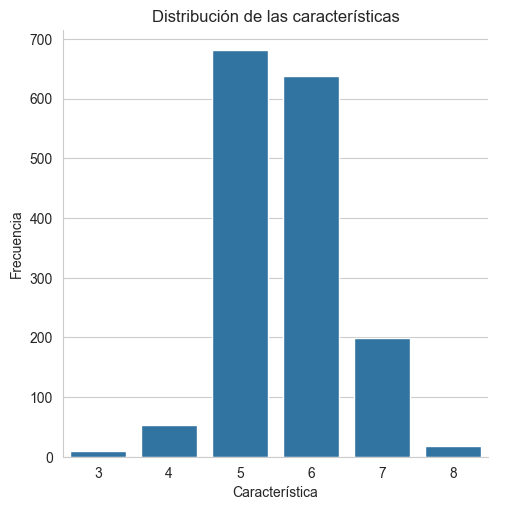

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

# Configuración del estilo de seaborn
sns.set_style("whitegrid")

# Imprimir la frecuencia de cada nivel de calidad
print(df["quality"].groupby(df["quality"]).size())

# Crear un gráfico de barras utilizando seaborn
sns.catplot(x="quality", kind="count", data=df)

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de las características')
plt.xlabel('Característica')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


# 5. Preparación del conjunto de datos

In [15]:
from sklearn.model_selection import train_test_split

# Proporción del conjunto de entrenamiento
p_train = 0.7

# Dividir el conjunto de datos en entrenamiento y prueba
train, test = train_test_split(df, train_size=p_train, random_state=42)

# Restablecer los índices de los conjuntos de entrenamiento y prueba
train.reset_index(inplace=True)
test.reset_index(inplace=True)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

# Imprimir las primeras filas del conjunto de entrenamiento
print("Conjunto de entrenamiento:")
print(train.head())

# Imprimir las primeras filas del conjunto de prueba
print("Conjunto de prueba:")
print(test.head())


Train: (1119, 13)
Test: (480, 13)
Conjunto de entrenamiento:
   index  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0    925            8.6              0.22         0.36             1.9   
1    363           12.5              0.46         0.63             2.0   
2    906            7.2              0.54         0.27             2.6   
3    426            6.4              0.67         0.08             2.1   
4   1251            7.5              0.58         0.14             2.2   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.064                 53.0                  77.0  0.99604  3.47   
1      0.071                  6.0                  15.0  0.99880  2.99   
2      0.084                 12.0                  78.0  0.99640  3.39   
3      0.045                 19.0                  48.0  0.99490  3.49   
4      0.077                 27.0                  60.0  0.99630  3.28   

   sulphates  alcohol  quality  
0       0.87    

# 6. Parametrización

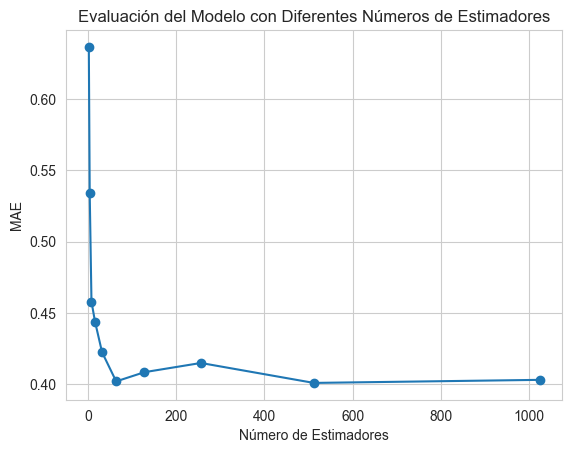

In [16]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Configuración de la validación cruzada en series temporales
cv = TimeSeriesSplit()

# Lista de números de estimadores a probar
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Lista para almacenar los resultados de MAE
total_scores = []

# Iterar sobre los diferentes números de estimadores
for estimators in l_estimators:
    fold_errors = []  # Lista para almacenar los errores en cada fold
    classifier = RandomForestClassifier(n_estimators=estimators,
                                        criterion="entropy",
                                        random_state=42)
    for train_fold, test_fold in cv.split(train):
        
        # División train-test siguiendo la estructura de series temporales
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]
        
        # Entrenamiento y predicción del modelo
        classifier.fit(X=f_train.drop(['quality'], axis=1),
                       y=f_train['quality'])
        y_pred = classifier.predict(X=f_test.drop(['quality'], axis=1))
        
        # Evaluación del modelo utilizando MAE
        mae = mean_absolute_error(f_test['quality'], y_pred)
        fold_errors.append(mae)

    # Calcula el MAE promedio para el número actual de estimadores
    total_scores.append(sum(fold_errors) / len(fold_errors))

# Graficar los resultados
plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')
plt.xlabel('Número de Estimadores')
plt.title('Evaluación del Modelo con Diferentes Números de Estimadores')
plt.show()


In [17]:
import numpy as np

# Encontrar el índice del valor mínimo en la lista total_scores
best_est_index = np.argmin(total_scores)

# Obtener el número óptimo de estimadores y el MAE asociado
best_est = l_estimators[best_est_index]
best_mae = total_scores[best_est_index]

# Imprimir el resultado
print("Número óptimo de estimadores: %i, MAE mínimo: %6.2f" % (best_est, best_mae))


Número óptimo de estimadores: 512, MAE mínimo:   0.40


# 7. Creación del modelo

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Crear un clasificador de bosque aleatorio con el mejor número de estimadores
classifier = RandomForestClassifier(n_estimators=best_est,
                                    criterion="entropy",
                                    random_state=42)

# Entrenar el clasificador con el conjunto de entrenamiento
classifier.fit(X=train.drop(['quality'], axis=1),
                y=train['quality'])

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X=test.drop(['quality'], axis=1))


In [19]:
from sklearn.metrics import mean_absolute_error

# Calcular el Error Absoluto Medio entre las etiquetas reales y las predicciones
mae = mean_absolute_error(test['quality'], y_pred)

# Imprimir el resultado
print(f"Error Absoluto Medio (MAE): {mae}")


Error Absoluto Medio (MAE): 0.3625


# 8. Evaluación del modelo

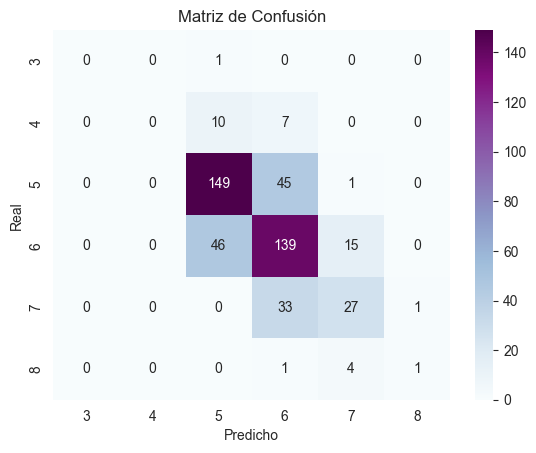

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(test["quality"], y_pred)

# Definir las clases para etiquetas
classes = ['3', '4', '5', '6', '7', '8']

# Crear un mapa de calor (heatmap) para visualizar la matriz de confusión
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='d', xticklabels=classes, yticklabels=classes)

# Configurar título y etiquetas de ejes
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

# Mostrar el mapa de calor
plt.show()
